In [1]:
%load_ext autoreload
%autoreload 2

from models import Darknet, load_classes
from utils.utils import *
import torch

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
config_path='config/yolov3.cfg'
# weights_path='./15.weights'
weights_path = './checkpoints/19.weights'
class_path='config/dwg.names'
img_size = 512

# Load model and weights
model = Darknet(config_path)
model.load_weights(weights_path)

model.eval()
classes = load_classes(class_path)
Tensor = torch.FloatTensor

/home/mk/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [3]:
from utils.datasets import ListDataset

dataloader = torch.utils.data.DataLoader(
    ListDataset('./data/dwg/train.txt', max_objects=87), batch_size=4, shuffle=False
)

<Figure size 432x288 with 0 Axes>

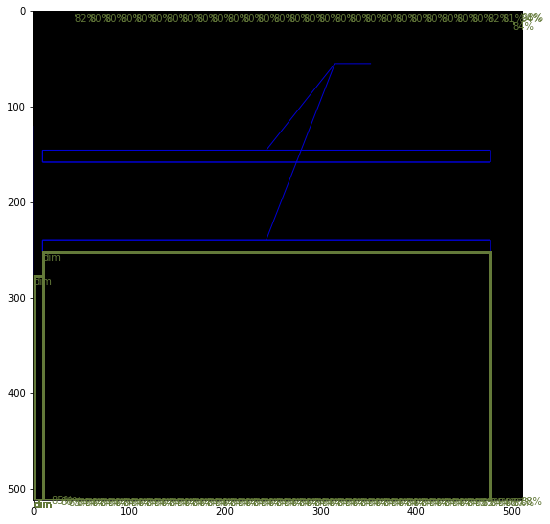

None

id: 2153fc83-8ae4-44f4-9f30-7f70979de72b entities: 27


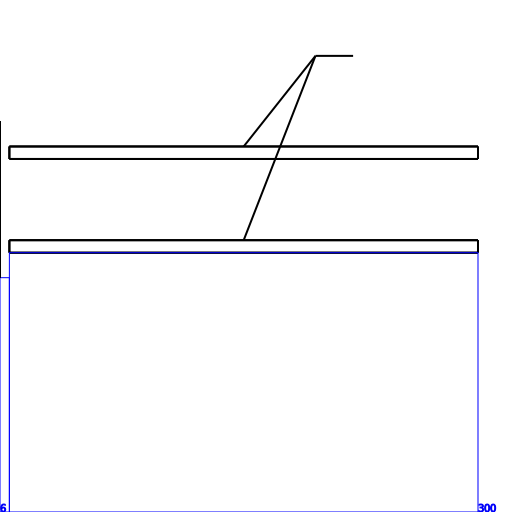

<Figure size 432x288 with 0 Axes>

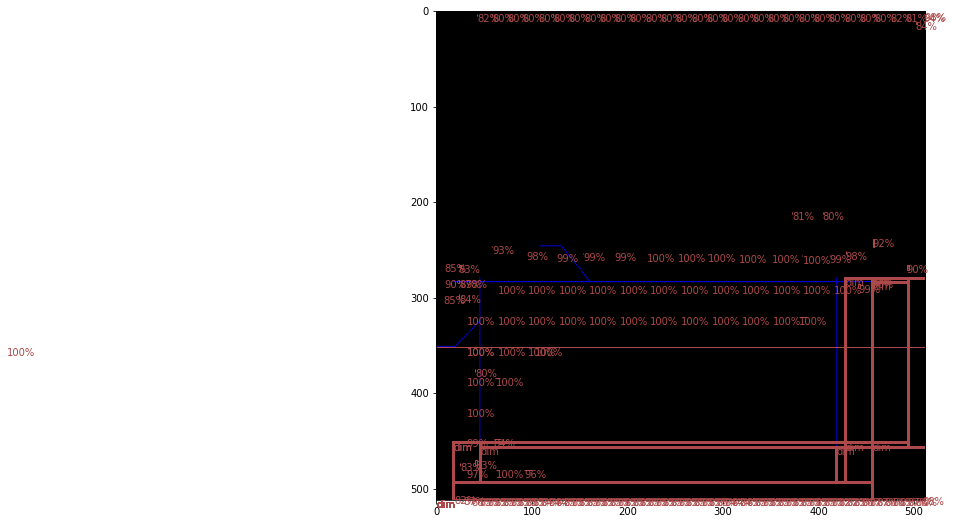

None

id: 515699da-5960-4e78-a8e5-3860b5b1cc21 entities: 19


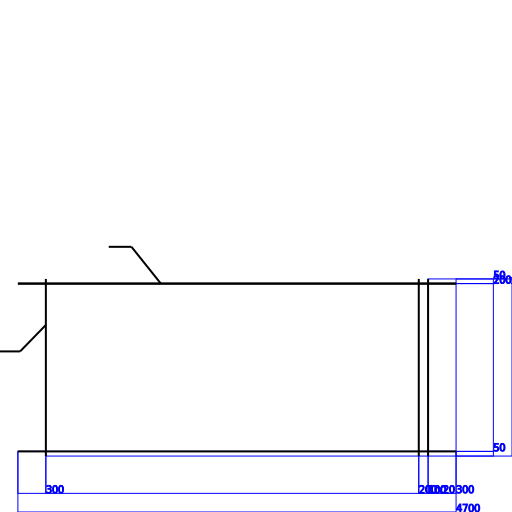

<Figure size 432x288 with 0 Axes>

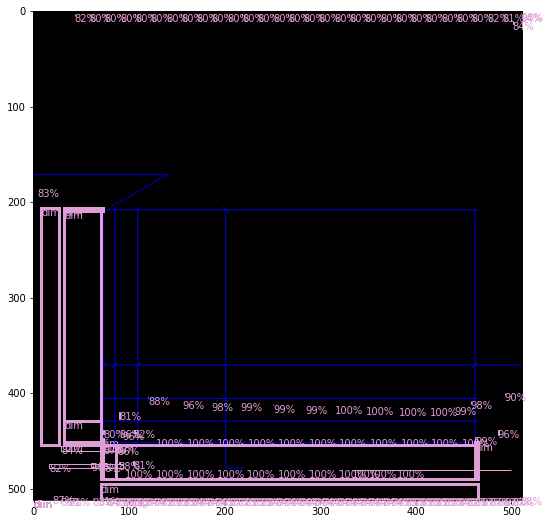

None

id: 3b93f218-cd96-41d0-8d8c-40154630ab9c entities: 33


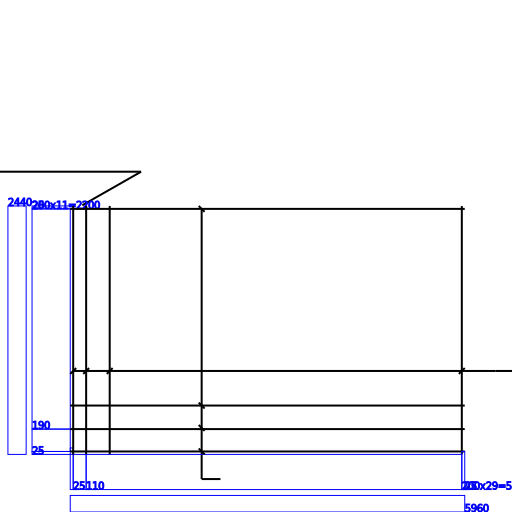

<Figure size 432x288 with 0 Axes>

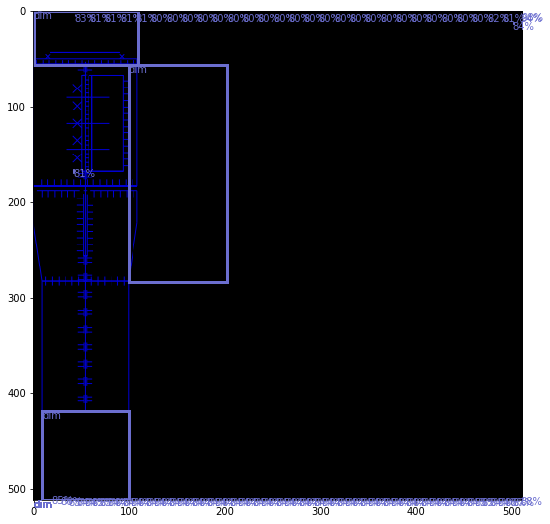

None

id: d0b84572-a5cc-4eaa-85a1-7f3f8d7d71cd entities: 260


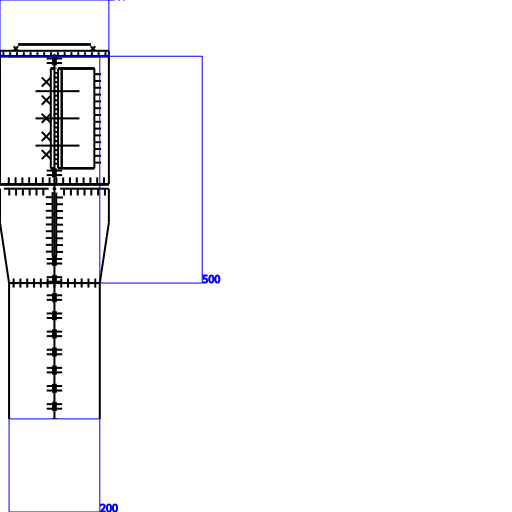

In [6]:


from models import CalculatePrediction
from utils.utils import PlotImageAndPrediction
from plot_graphics import generate_file2
from IPython import display
import os

for batch_i, (file_names, imgs, targets) in enumerate(dataloader):
    dets = CalculatePrediction(model=model, batch_of_images=imgs)
    for i, _img in enumerate(imgs):
        det = dets[i]
        trg = targets[i]
        display.display(PlotImageAndPrediction(image=_img, target=trg, detections=det))
        
        file_id = os.path.splitext(os.path.split(file_names[i])[1])[0]
        d, _ = generate_file2(file_id=file_id, draw_dimensions=True, draw_texts=False, save_file=False)
        display.display(d)
        
    break